In [1]:
import pandas as pd


In [7]:
data = pd.read_csv('data_banknote_authentication.txt', sep=",", header=None)
data.columns = ["Variance", "Skewness", "Kurtosis", "Entropy","Class"]
data

,Variance,Skewness,Kurtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [9]:
x = data[["Variance","Skewness","Kurtosis","Entropy"]].values
x

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [10]:
y = data["Class"].values
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [11]:
from sklearn.model_selection import train_test_split
xTest,xTrain,yTest,yTrain = train_test_split(x,y,train_size=0.2,random_state=0)


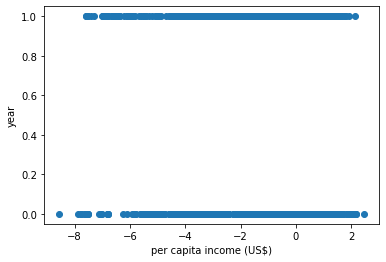

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xlabel('per capita income (US$)')
plt.ylabel('year')
plt.scatter(data[['Entropy']],data['Class'])

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(xTrain,yTrain)


LinearRegression()

In [18]:
ypred= model.predict(xTest)
ypred

array([ 0.95110566,  0.8997581 ,  0.88190311,  0.06104795,  0.04294223,
       -0.03188002, -0.00317974,  0.68415738,  0.51348231,  0.95956048,
        0.03123957, -0.02169489,  0.58518043,  0.9892791 ,  0.12935198,
        1.13079207,  0.04392213,  0.77262448, -0.03205766,  1.05761693,
        1.02028573,  1.00676708,  0.01710878,  0.77165402,  0.97734237,
        0.75354794,  0.72322205, -0.03728173,  0.80582441,  0.17473769,
        0.04431541,  0.18792798, -0.2915017 ,  0.02100754,  0.06630403,
        1.00922548,  0.80927482,  0.05003392,  1.0099119 ,  0.43799788,
        0.93391054, -0.0694126 ,  0.90976986,  0.87262474,  0.03331875,
        0.1208598 , -0.21454979,  1.05781962,  0.82478153,  0.02586081,
        0.0912019 , -0.01050771,  1.00013655, -0.00442514, -0.08167587,
        0.03299121,  1.09548347,  0.91200514,  0.70850557,  0.98253455,
        0.06221629,  0.8886113 , -0.219075  ,  0.16970562,  0.71749756,
        0.75496058, -0.06536308,  0.78536197,  0.01060348,  0.09

In [19]:
from sklearn.metrics import r2_score
r2 = r2_score(yTest, ypred)
r2

0.8816585844704431

In [27]:
model.predict([[0.32924,8.66610,-2.4586,0.34179]])

array([0.31876117])